<a href="https://colab.research.google.com/github/pvalorconsultoria/nlp_lab_usp/blob/main/NLP_Lab_USP_Portuchin%C3%AAs_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portuchinês Language Model

Para facilitar o ensino da língua chinesa entre falantes do português, um grupo de professores
criou o [portuchinês](https://drive.google.com/file/d/1tvZOE0IPXSpTkKv6CGgaPgo3NvtNT-Vj/view?usp=sharing). A ideia básica por de trás da língua é usar palavras em português e a
gramática do mandarim uma vez que essa possui regras e estruturas diferentes que dificultam o
diálogo entre os falantes das duas línguas. Em especial, o portuchinês tem como principal
propósito apresentar os modificadores tão comuns na língua chinesas e desconhecidos aos
português.

## Participantes

Diego Magalhães Rodrigues - NUSP: 12704028

Email: diego@pvalorconsultoria.com.br

## Modelo de Linguagem

Os modelos de linguagem são um tipo de inteligência artificial (IA) que pode ser usado para entender e gerar linguagem natural. Eles são usados em aplicativos de processamento de linguagem natural (NLP), como tradução automática, resumo de texto, resposta a perguntas e muito mais. Os modelos de linguagem são treinados em grandes conjuntos de dados de texto para aprender a estrutura e o significado da linguagem. Isso permite que eles gerem novas frases que soam como se tivessem sido escritas por um humano.

Os modelos de linguagem tornaram-se cada vez mais importantes para tarefas de PNL devido à sua capacidade de capturar as nuances da linguagem natural. Eles podem ajudar as máquinas a entender melhor o contexto das conversas e interpretar com precisão a entrada do usuário. À medida que a tecnologia de IA continua a evoluir, os modelos de linguagem se tornarão ainda mais importantes para os aplicativos de NLP.

## Aprenzidado por Transferência

O aprendizado por transferência é uma técnica poderosa que nos permite usar modelos de linguagem já treinados para novas tarefas. Essa técnica tem sido usada em muitas áreas, como processamento de linguagem natural (NLP) e visão computacional. Um dos modelos de linguagem mais populares para aprendizado por transferência é o BERT, desenvolvido por pesquisadores de IA do Google.

Esse modelo pode ser usado para treinar rapidamente um novo modelo em uma tarefa específica sem precisar começar do zero. Também pode ser usado para ajustar os modelos existentes para melhor desempenho em tarefas específicas. Ao usar o aprendizado por transferência, podemos economizar tempo e recursos e, ao mesmo tempo, obter bons resultados em nossas tarefas-alvo.

## Motivação para esse Exemplo

A democratização da tecnologia de IA tem sido um dos principais focos da comunidade de pesquisa nos últimos anos. Uma maneira de conseguir isso é criar modelos multilíngues que possam ser usados por pesquisadores de diferentes países e culturas. Isso é especialmente importante para os países de língua portuguesa, que têm menos recursos do que outros idiomas, como o chinês. Ao criar modelos linguísticos compatíveis tanto com o português como com o chinês, a comunidade de pesquisa portuguesa pode beneficiar da vasta quantidade de recursos disponíveis em chinês e utilizá-los para aprofundar a sua própria investigação. Isso os ajudará a crescer e se tornar mais competitivos na comunidade global de IA.

## Modelo de Linguagem para o Portuchinês

Neste exemplo, vamos refinar o modelo de linguagem  [bert-base-chinese](https://huggingface.co/bert-base-chinese), um modelo de linguagem baseado em atenção em grandes corpos de texto escritos em mandarim, e adaptá-lo ao idioma criado para o ensino de mandarim para falantes de português - o portuchinês :)

Como visto no site da hugging-face, o modelo bert-base-chinese é baseado no modelo BERT original, mas foi adaptado para entender melhor o texto chinês. Isso torna mais fácil para os desenvolvedores criar modelos que possam processar com precisão o texto chinês e gerar resultados significativos.  Esse modelo tem sido usado em várias aplicações, como classificação de texto, resposta a perguntas e análise de sentimentos, etc.

No nosso caso, vamos criar um dataset sintético do portuchinês e adaptar esse grande modelo de linguagem em mandarim para essa língua construída. Assim, esperamos que esse pequeno novo modelo de linguagem seja capaz de entender a gramática do portuchinês, emprestada do mandarim, mas também introduzir palavras em português em seu vocabulário.

Outro experimento interessante é saber se o modelo que foi treinado em grandes volumes de texto do mandarim seria capaz de expandir as capacidades do portuchincês. Isto é, certas regras gramáticas que estão bastante presentes no mandarim seriam automaticamente aprendidas sem que haja exemplos no dataset sintético criado para o exemplo xD.


In [ ]:
!pip install transformers tokenizers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install -U transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Criação do Dataset Sintético

O dataset sintético é criado com base em regras gramáticas do mandarim com palavras do português. Para maiores detalhes veja esse documento que explica como funciona essa língua construída.

In [ ]:
import random

random.seed(42)

sujeitos = ["eu", "ele", "ela", "nós", "eles", "elas", "professor", "aluno", "Diego", "Carol"]
verbos = ["amar", "gostar", "desejar", "comer", "ver", "achar"]
objetos = ["cachorro", "gato", "banana", "maçã", "bolacha", "melancia", "porco"]
adjetivos = ["bonito", "legal", "divertido", "emocionante", "exuberante"]

numerais = ["dois", "três", "quatro", "cinco", "seis", "meia-duzia", "sete", "oito", "nove", "dez", "onze", "doze", "duzia"]
tempos = ["hoje", "ontem", "amanhã", "ano passado", "ano que vem", "hoje tarde", "hoje cedo", "hoje noite", "amanhã cedo", "amanhã tarde"]
locais = ["casa", "escola", "trabalho", "USP", "universidade", "faculdade"]

mod_perguntas = [
  "吗",           # Ma - perguntas afirmativas
  "谁",           # Shei - Quem?
  "那",           # Na - Qual? 
  "多少",         # Duo shao - Quantos? 
  "怎么",         # Zen Me - Como?
  "为身么",       # Wei Shen Me - Por que?
]

In [ ]:
rand = random.random

def gerar_adjetivo():
  return random.choice(adjetivos)

def gerar_sujeito(composto=random.random()):
  if composto or rand() > 0.3:
    a = random.sample(sujeitos, 2)
    a.insert(1, "和")
    a.append("都")
    return a
  else:
    return random.sample(sujeitos, 1)

def gerar_objeto(com_adjetivo=None, com_numerais=None):
  o = random.sample(objetos, 1)
  
  if com_numerais or rand() > 0.5:
    o.insert(0, random.choice(numerais))
    o.insert(1, "个")

  if com_adjetivo or rand > 0.5:
      a = gerar_adjetivo()

      o.append(a)

      if rand() > 0.5: # intensidade
        o.insert(1, "太")
        o.append("了")

      return o
  else:
    return o

def gerar_verbo(duplicacao=None, negativa=None):
  v = random.sample(verbos, 1)

  if duplicacao or rand() > 0.3:
    v = v + v
  
  if rand() > 0.3:
    v.insert(0, "不")
  
  return v

def gerar_tempo():
  return random.sample(tempos, 1)

def gerar_local():
  return random.sample(locais, 1)

def gerar_sentenca_basica(
    com_adjetivo=None, 
    sujeito_composto=None,
    duplicacao_verbal=None,
    negativa=None,
    com_tempo=None,
    com_local=None):
  s = gerar_sujeito(sujeito_composto)
  
  if com_tempo or rand() > 0.5:
    q = gerar_tempo()
  else:
    q = []
  
  if com_local or rand() > 0.5:
    l = gerar_local()
  else:
    l = []

  v = gerar_verbo(duplicacao_verbal, negativa)
  o = gerar_objeto(com_adjetivo)

  sent = sum([s,q,l,v,o], [])

  return sent

In [ ]:
gerar_sentenca_basica(com_adjetivo=0.6, sujeito_composto=0.6, duplicacao_verbal=0.6, negativa=0.6)

['eu', '和', 'eles', '都', '不', 'amar', 'amar', 'bolacha', 'emocionante']

In [ ]:
def gerar_sentenca(
    negativa=random.random(), 
    pergunta=random.random(), 
    com_adjetivo=random.random()):
  
  sentenca = gerar_sentenca_basica(
      com_adjetivo=com_adjetivo,
      negativa=negativa
  )

  if pergunta or rand() > 0.3:
    mod = random.choice(mod_perguntas)

    sentenca.append(mod)

  return {
      "sentenca": " ".join(sentenca),
      "sujeitos": set(sujeitos).intersection(sentenca),
      "verbo": set(verbos).intersection(sentenca),
      "numerais": set(numerais).intersection(sentenca),
      "objeto": set(objetos).intersection(sentenca),
      "tempo": set(tempos).intersection(sentenca),
      "local": set(locais).intersection(sentenca)
  }

In [ ]:
gerar_sentenca(com_adjetivo=0.6, pergunta=0.6, negativa=0.6)

{'sentenca': 'Diego 和 professor 都 casa 不 gostar gostar gato divertido 多少',
 'sujeitos': {'Diego', 'professor'},
 'verbo': {'gostar'},
 'numerais': set(),
 'objeto': {'gato'},
 'tempo': set(),
 'local': {'casa'}}

In [ ]:
def gerar_dataset(n=1000):
  ds = []

  for _ in range(n):
    sent = gerar_sentenca()

    ds.append(sent)
  
  return ds


Essa é o resultado do dataset gerado. Uma sentença completa seguindo as regras do portuchinês e também algumas entidades reconhecidas da sentença com o intuito de posteriormente treinar o modelo na tarefa de Named Entity Recognition. 

In [ ]:
ds = gerar_dataset(n=10000)
ds[0:2]

[{'sentenca': 'elas hoje universidade 不 amar amar bolacha 太 exuberante 了 那',
  'sujeitos': {'elas'},
  'verbo': {'amar'},
  'numerais': set(),
  'objeto': {'bolacha'},
  'tempo': {'hoje'},
  'local': {'universidade'}},
 {'sentenca': 'ele 和 eu 都 ano que vem escola 不 amar amar porco divertido 为身么',
  'sujeitos': {'ele', 'eu'},
  'verbo': {'amar'},
  'numerais': set(),
  'objeto': {'porco'},
  'tempo': {'ano que vem'},
  'local': {'escola'}}]

In [ ]:
from datasets import Dataset

dataset = Dataset.from_list(ds)
dataset

Dataset({
    features: ['sentenca', 'sujeitos', 'verbo', 'numerais', 'objeto', 'tempo', 'local'],
    num_rows: 10000
})

In [ ]:
dataset = dataset.rename_column("sentenca", "text")

Aqui fazemos o split no dataset de treino e de teste para posteriormente treinar e avaliar o nosso modelo de linguagem.

In [ ]:
dataset = dataset.train_test_split(
    train_size=7500, test_size=2500, seed=42
)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'sujeitos', 'verbo', 'numerais', 'objeto', 'tempo', 'local'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['text', 'sujeitos', 'verbo', 'numerais', 'objeto', 'tempo', 'local'],
        num_rows: 2500
    })
})

Aqui vamos importar o modelo e o seu tokenizador pré-treinados do hugging-face. Lembrando, esses modelos foram treinados apenas em corpus de texto em mandarim e não reconhecem as palavras em português de nosso dataset sintético.

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")

model = AutoModelForMaskedLM.from_pretrained("bert-base-chinese")

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
sample = dataset["train"]["text"][0]
sample

'professor 和 Carol 都 不 gostar banana 太 bonito 了 吗'

Por exemplo, olhe como o tokenizador desse modelo não realiza um bom trabalho na frase escrita em portuchinês. 

In [ ]:
print(tokenizer.tokenize(sample))

['pro', '##fe', '##ss', '##or', '和', '[UNK]', '都', '不', 'go', '##star', 'ba', '##nan', '##a', '太', 'bo', '##ni', '##to', '了', '吗']


In [ ]:
tokenizer.vocab_size

21128

Aqui realizamos um retreino do tokenizador no dataset de treino.

In [ ]:
pt_tokenizer = tokenizer.train_new_from_iterator(dataset["train"]["text"], 22_000)
pt_tokenizer.vocab_size

258

In [ ]:
new_tokens = set(pt_tokenizer.vocab.keys()) - set(tokenizer.vocab.keys())
print(new_tokens)

{'cinco', 'banana', 'gato', '##nco', 'trabalho', 'Diego', 'eles', 'três', '##ante', 'dois', 'un', 'por', '##cu', 'quatro', 'USP', 'emocionante', 'casa', '##onante', 'leg', '##ldade', 'tarde', '##hã', '##ç', 'aluno', 'S', '##ado', 'sete', 'P', 'D', 'ê', 'eu', '##ê', 'divertido', 'bon', 'comer', '##ido', 'profes', 'passado', '##fes', '##dade', '##acha', 'nó', '##ej', 'escola', 'cas', '##tido', 'elas', '##sor', '##sado', 'cachorro', 'ban', 'amar', 'desejar', 'ach', 'nove', 'oito', 'U', 'doze', 'Car', 'melancia', 'cach', '##anhã', '##erante', '##oci', 'bol', '##ês', '##ó', 'universidade', 'exuberante', 'achar', '##uno', 'bolacha', 'tar', 'melan', 'Carol', 'maçã', 'nós', 'legal', '##ã', 'vem', 'Di', 'gostar', 'ã', 'porco', 'ela', 'escol', 'duzia', 'emoci', 'ontem', 'faculdade', '##iv', 'pas', '##idade', 'onze', '##iver', 'hoje', '##çã', '##atro', 'trab', 'desej', 'ç', 'professor', 'cedo', 'que', 'meia', 'bonito', 'C', '##S', 'diver', '##P', 'seis', '##je', 'facu', 'exub', 'noite', '##zia', 

In [ ]:
tokenizer.add_tokens(list(new_tokens))
len(tokenizer)

21259

In [ ]:
model.resize_token_embeddings(len(tokenizer))

Embedding(21259, 768)

Agora, após o retreino, temos uma tokenização perfeita para o nosso dataset. O que será imprescindível para retreinarmos o modelo de linguagem BERT. 

In [ ]:
print(tokenizer.tokenize(sample))

['professor', '和', 'Carol', '都', '不', 'gostar', 'banana', '太', 'bonito', '了', '吗']


## Experimentando com o modelo pré-treino

Antes de treinar o modelo vamos ver como ele se comporta numa frase de exemplo. No caso do BERT, usamos o token [MASK] para simplesmente ocultar uma palavra de nossa frase e o que o modelo simplesmente fará é, dado seu conhecimento da linguagem em que foi treinado, prever qual palavra que mais se adequa àquele **contexto**.

In [ ]:
from transformers import pipeline

classifier = pipeline(task="fill-mask", model=model, tokenizer=tokenizer)

### Experimento 1: Duplicação Verbal

A duplicação de verbos é uma característica única da língua mandarim, que envolve a repetição de um verbo duas vezes para enfatizar seu significado. Essa técnica é usada para expressar emoções fortes ou para enfatizar uma ação. Também pode ser usado para adicionar ênfase ou clareza ao falar em mandarim. 

No caso do portuchinês ela também está presente. Entretanto, os verbos estão em português e não em mandarim. Logo, o modelo é incapaz de prever que esse fenômeno ocorre na frase abaixo. 

In [ ]:
text = "elas 和 ela 都 不 ver [MASK] seis 太 个 maçã divertido 了 怎么"

In [ ]:
classifier(text)

[{'score': 0.6550114750862122,
  'token': 11912,
  'token_str': '##tical',
  'sequence': 'elas 和 ela 都 不 vertical seis 太 个 maçã divertido 了 怎 么'},
 {'score': 0.0376930870115757,
  'token': 8169,
  'token_str': '##i',
  'sequence': 'elas 和 ela 都 不 veri seis 太 个 maçã divertido 了 怎 么'},
 {'score': 0.030679529532790184,
  'token': 8165,
  'token_str': '##t',
  'sequence': 'elas 和 ela 都 不 vert seis 太 个 maçã divertido 了 怎 么'},
 {'score': 0.01704753190279007,
  'token': 8204,
  'token_str': '##b',
  'sequence': 'elas 和 ela 都 不 verb seis 太 个 maçã divertido 了 怎 么'},
 {'score': 0.01231157872825861,
  'token': 8299,
  'token_str': '##te',
  'sequence': 'elas 和 ela 都 不 verte seis 太 个 maçã divertido 了 怎 么'}]

## Pré-processamento do Dataset

Para que nosso dataset seja processado pelo modelo BERT temos que adequar o input as configurações que esse modelo foi treinada. Nesse caso, vamos aplicar o tokenizador e depois adicionar padding ao exemplos. Assim, quando o modelo for treinar ele não irar disparar nenhum erro ou "estranhar" os exemplos dados - dificultando seu aprendizado.

In [ ]:
import numpy as np
import pandas as pd

def tokenize_and_pad(text):
  tokens = tokenizer(text)

  N = len(tokens["input_ids"])

  tokens["input_ids"] = [tokens["input_ids"][i] if i < N else 0 for i in range(512)]
  tokens["token_type_ids"] = [tokens["token_type_ids"][i] if i < N else 0 for i in range(512)]
  tokens["attention_mask"] = [tokens["attention_mask"][i] if i < N else 0 for i in range(512)]
  tokens["word_ids"] = [tokens.word_ids(0)[i] if i < N else 0 for i in range(512)]

  return tokens


In [ ]:
def tokenize_function(dataset):
    result = {
        "input_ids": [],
        "token_type_ids": [],
        "attention_mask": [],
        "word_ids": []
    }
    
    for text in dataset["text"]:
      tokens = tokenize_and_pad(text)
      
      for key in result.keys():
        result[key].append(tokens[key])
    
    return result

In [ ]:
tokenized_datasets = dataset.map(
    tokenize_function, batched=True, remove_columns=['sujeitos', 'verbo', 'numerais', 'objeto', 'tempo', 'local']
)
tokenized_datasets

Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'input_ids', 'token_type_ids', 'attention_mask', 'word_ids'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['text', 'input_ids', 'token_type_ids', 'attention_mask', 'word_ids'],
        num_rows: 2500
    })
})

In [ ]:
tokenized_datasets["train"]["text"][0]

'professor 和 Carol 都 不 gostar banana 太 bonito 了 吗'

In [ ]:
print(tokenized_datasets["train"]["input_ids"][0])

[101, 21229, 1469, 21202, 6963, 679, 21209, 21129, 1922, 21233, 749, 1408, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
tokenizer.decode(tokenized_datasets["train"]["input_ids"][0])

'[CLS] professor 和 Carol 都 不 gostar banana 太 bonito 了 吗 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

Aqui vamos usar o data_collator para aplicar aleatóriamente [MASK] em diversos exemplos encontrados em nosso dataset para o modelo aprender qual palavra melhor encaixa em cada contexto.

In [ ]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)

In [ ]:
train_size = 0.9
test_size = 0.1

downsampled_dataset = tokenized_datasets["train"].train_test_split(
    train_size=train_size, test_size=test_size, seed=42
)
downsampled_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'input_ids', 'token_type_ids', 'attention_mask', 'word_ids'],
        num_rows: 6750
    })
    test: Dataset({
        features: ['text', 'input_ids', 'token_type_ids', 'attention_mask', 'word_ids'],
        num_rows: 750
    })
})

## Transferência de Aprenziado via treino do modelo

Agora, vamos de fato treinar nosso modelo de linguagem do mandarim para o portuchinês. Para se ter uma ideia ele consiste de nada menos do que 102.290.312 parâmetros que precisam ser ajustados para esssa nova linguagem.  

In [ ]:
from transformers import TrainingArguments

batch_size = 16
# Show the training loss with every epoch
logging_steps = len(downsampled_dataset["train"]) // batch_size
model_name = "bert-base-portuchines"

training_args = TrainingArguments(
    output_dir=model_name,
    overwrite_output_dir=True,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    num_train_epochs=4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    push_to_hub=False,
    fp16=False,
    logging_steps=logging_steps,
)

Como podemos ver o modelo foi treinado em 4 épocas obteve a seguinte curva de aprendizado.

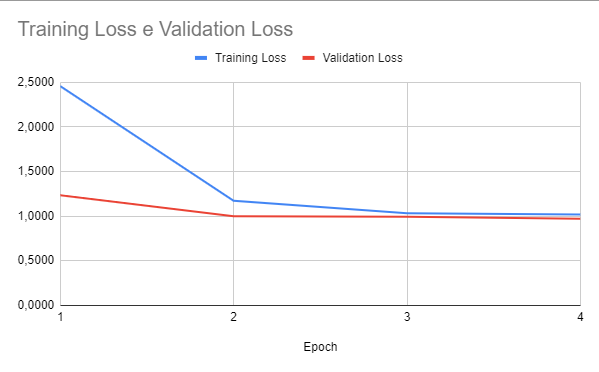

Mostrando uma melhora a cada epoca. No final, vamos salvar a última versão do modelo e salvá-la em arquivo zip para que ele possa ser compartilhado e usado posteriormente.

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=downsampled_dataset["train"],
    eval_dataset=downsampled_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: word_ids, text. If word_ids, text are not expected by `BertForMaskedLM.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6750
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1688
  Number of trainable parameters = 102391051
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to enc

Epoch,Training Loss,Validation Loss
1,2.457000,1.235106
2,1.171800,0.999604
3,1.033600,0.993978
4,1.018200,0.971816


The following columns in the evaluation set don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: word_ids, text. If word_ids, text are not expected by `BertForMaskedLM.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 16
Saving model checkpoint to bert-base-portuchines/checkpoint-500
Configuration saved in bert-base-portuchines/checkpoint-500/config.json
Configuration saved in bert-base-portuchines/checkpoint-500/generation_config.json
Model weights saved in bert-base-portuchines/checkpoint-500/pytorch_model.bin
tokenizer config file saved in bert-base-portuchines/checkpoint-500/tokenizer_config.json
Special tokens file saved in bert-base-portuchines/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: word_ids, text. If word_ids, text are not expected by `BertForMaskedLM.

TrainOutput(global_step=1688, training_loss=1.41949171195098, metrics={'train_runtime': 772.3549, 'train_samples_per_second': 34.958, 'train_steps_per_second': 2.186, 'total_flos': 7105761635328000.0, 'train_loss': 1.41949171195098, 'epoch': 4.0})

## Resultados

A perplexidade é uma métrica importante usada para avaliar a qualidade dos modelos de linguagem no processamento de linguagem natural (NLP). Ele mede o quão bem um modelo pode prever a próxima palavra em uma frase e é calculado tomando o inverso da probabilidade de uma determinada frase. A perplexidade é usada para avaliar o quão bem um modelo de linguagem pode gerar um texto semelhante ao texto gerado por humanos. Ao usar a perplexidade, podemos comparar diferentes modelos de linguagem e determinar qual deles tem melhor desempenho.

Nosso modelo obteve uma perplexidade de 2.84 que é considerada ótima e para esse exemplo vamos parar seu treinamento por aqui.

In [ ]:
import math

eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

The following columns in the evaluation set don't have a corresponding argument in `BertForMaskedLM.forward` and have been ignored: word_ids, text. If word_ids, text are not expected by `BertForMaskedLM.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 750
  Batch size = 16


>>> Perplexity: 2.66


In [ ]:
from transformers import pipeline

classifier = pipeline(task="fill-mask", model=model.to("cpu"), tokenizer=tokenizer)

### Experimento 1: Duplicação Verbal

Como podemos ver no resultado abaixo, o modelo pós-treinado foi capaz de prever com uma confiança de 88% que dado um verbo no portuchinês e uma máscara o fenômeno gramatical ocorrido é o da duplicação verbal. 

In [ ]:
text = "elas 和 ela 都 不 ver [MASK] seis 太 个 maçã divertido 了 怎么"

In [ ]:
classifier(text) # ver pela regra de duplicação verbal do mandarim

[{'score': 0.9999583959579468,
  'token': 12513,
  'token_str': 'ver',
  'sequence': 'elas 和 ela 都 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 1.2454743227863219e-05,
  'token': 21180,
  'token_str': 'desejar',
  'sequence': 'elas 和 ela 都 不 ver desejar seis 太 个 maçã divertido 了 怎 么'},
 {'score': 1.023336335492786e-05,
  'token': 21209,
  'token_str': 'gostar',
  'sequence': 'elas 和 ela 都 不 ver gostar seis 太 个 maçã divertido 了 怎 么'},
 {'score': 4.741455541079631e-06,
  'token': 21197,
  'token_str': 'achar',
  'sequence': 'elas 和 ela 都 不 ver achar seis 太 个 maçã divertido 了 怎 么'},
 {'score': 3.778675591092906e-06,
  'token': 21179,
  'token_str': 'amar',
  'sequence': 'elas 和 ela 都 不 ver amar seis 太 个 maçã divertido 了 怎 么'}]

### Experimento 2: Modificador 和

O modificador 和 é uma parte importante da língua chinesa e é usado para expressar uma variedade de significados. Pode ser usado para indicar uma conexão entre dois substantivos, para expressar concordância ou harmonia entre duas pessoas ou coisas e até mesmo para indicar um contraste entre duas ideias.

Em nosso conjunto de dados, foi utilizado para casos em que dois sujeitos realizam uma ação, ou seja, um sujeito composto. E como podemos ver ele prevê com 99% de chances que esse modificador deve ser introduzido no lugar da máscara.



In [ ]:
text = "elas [MASK] ela 都 不 ver ver seis 太 个 maçã divertido 了 怎么"

In [ ]:
classifier(text) # 和 He pois é usado como "e"

[{'score': 0.9999085664749146,
  'token': 1469,
  'token_str': '和',
  'sequence': 'elas 和 ela 都 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 3.918065704056062e-05,
  'token': 510,
  'token_str': '、',
  'sequence': 'elas 、 ela 都 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 2.225964817625936e-05,
  'token': 1350,
  'token_str': '及',
  'sequence': 'elas 及 ela 都 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 1.198389054479776e-05,
  'token': 6656,
  'token_str': '跟',
  'sequence': 'elas 跟 ela 都 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 3.86247711503529e-06,
  'token': 21223,
  'token_str': 'hoje',
  'sequence': 'elas hoje ela 都 不 ver ver seis 太 个 maçã divertido 了 怎 么'}]

## Salvando o Modelo 

In [ ]:
trainer.save_model("bert-base-portuchines-lm")

Saving model checkpoint to bert-base-portuchines-lm
Configuration saved in bert-base-portuchines-lm/config.json
Configuration saved in bert-base-portuchines-lm/generation_config.json
Model weights saved in bert-base-portuchines-lm/pytorch_model.bin
tokenizer config file saved in bert-base-portuchines-lm/tokenizer_config.json
Special tokens file saved in bert-base-portuchines-lm/special_tokens_map.json


In [ ]:
!zip -r /content/bert-base-portuchines-lm.zip /content/bert-base-portuchines-lm

updating: content/bert-base-portuchines-lm/ (stored 0%)
updating: content/bert-base-portuchines-lm/training_args.bin (deflated 48%)
updating: content/bert-base-portuchines-lm/generation_config.json (deflated 8%)
updating: content/bert-base-portuchines-lm/config.json (deflated 53%)
updating: content/bert-base-portuchines-lm/added_tokens.json (deflated 69%)
updating: content/bert-base-portuchines-lm/special_tokens_map.json (deflated 42%)
updating: content/bert-base-portuchines-lm/tokenizer_config.json (deflated 41%)
updating: content/bert-base-portuchines-lm/vocab.txt (deflated 48%)
updating: content/bert-base-portuchines-lm/pytorch_model.bin (deflated 7%)
updating: content/bert-base-portuchines-lm/tokenizer.json (deflated 76%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp /content/bert-base-portuchines-lm.zip /content/drive/MyDrive

Mounted at /content/drive


## Carregando o modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/bert-base-portuchines-lm.zip /content

Mounted at /content/drive


In [ ]:
!unzip bert-base-portuchines-lm.zip -d /content/bert-base-portuchines-lm

Archive:  bert-base-portuchines-lm.zip
   creating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/training_args.bin  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/generation_config.json  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/config.json  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/added_tokens.json  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/special_tokens_map.json  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/tokenizer_config.json  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/vocab.txt  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm/pytorch_model.bin  
  inflating: /content/bert-base-portuchines-lm/content/bert-base-portuchines-lm

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

path = "/content/bert-base-portuchines-lm/content/bert-base-portuchines-lm"

model = AutoModelForMaskedLM.from_pretrained(path)
tokenizer = AutoTokenizer.from_pretrained(path)

In [ ]:
from transformers import pipeline

classifier = pipeline(task="fill-mask", model=model, tokenizer=tokenizer)

## Capacidade de Generalização

Vamos testar a hipótese de que o modelo anterior foi capaz de manter o conhecimento que detinha sobre o mandarim. Assim, além de decorar as regras do portuchinês, ele seria capaz de ir além do dataset de treino.

In [ ]:
text = "elas 和 ela [MASK] 不 ver ver seis 太 个 maçã divertido 了 怎么"

### Experimento 1: sinônimos

Como podemos ver ele foi capaz de prever corretamente o modificador 都 que significa o ambos. E deu quase nenhuma significânica para os seguintes tokens:
- 均 = [equal; even; all; uniform](https://www.purpleculture.net/dictionary-details/?word=%E5%9D%87)
- 皆 = [all; each and every; in all cases](https://www.purpleculture.net/dictionary-details/?word=%E7%9A%86)

Embora não sejam os tokens usados em portuchinês, eles carregam um valor semântico muito semelhante ao 都.


In [ ]:
classifier(text)

[{'score': 0.9998607635498047,
  'token': 6963,
  'token_str': '都',
  'sequence': 'elas 和 ela 都 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 4.679344056057744e-05,
  'token': 1772,
  'token_str': '均',
  'sequence': 'elas 和 ela 均 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 3.289724554633722e-05,
  'token': 4639,
  'token_str': '皆',
  'sequence': 'elas 和 ela 皆 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 1.0306255717296153e-05,
  'token': 21257,
  'token_str': 'amanhã',
  'sequence': 'elas 和 ela amanhã 不 ver ver seis 太 个 maçã divertido 了 怎 么'},
 {'score': 9.489191143075004e-06,
  'token': 21195,
  'token_str': 'universidade',
  'sequence': 'elas 和 ela universidade 不 ver ver seis 太 个 maçã divertido 了 怎 么'}]

### Experimento 2: Aspecto Temporal

Nesse caso, dada uma frase completa em mandarim ele foi capaz de prever que os tokens mais prováveis são sujeitos. Isso pode ser devido a estrutura Sujeito + Verbo + Predicado do chinês mas também apenas um víes por conta dos exemplos em nosso dataset sintético.

In [ ]:
# 他 下午 的 家 的 老师 看 狗 -> Ele vê o cachorro de tarde na casa do seu professor
text = "[MASK] 下午 的 家 的 老师 看 狗"
classifier(text)

[{'score': 0.09712351858615875,
  'token': 21133,
  'token_str': 'Diego',
  'sequence': 'Diego 下 午 的 家 的 老 师 看 狗'},
 {'score': 0.07632485777139664,
  'token': 21204,
  'token_str': 'nós',
  'sequence': 'nós 下 午 的 家 的 老 师 看 狗'},
 {'score': 0.0671427920460701,
  'token': 21174,
  'token_str': 'elas',
  'sequence': 'elas 下 午 的 家 的 老 师 看 狗'},
 {'score': 0.06393009424209595,
  'token': 21214,
  'token_str': 'duzia',
  'sequence': 'duzia 下 午 的 家 的 老 师 看 狗'},
 {'score': 0.04846171289682388,
  'token': 21151,
  'token_str': 'aluno',
  'sequence': 'aluno 下 午 的 家 的 老 师 看 狗'}]

Adicionando um sujeito e apenas ocultando o aspecto temporal da frase 下午 (de tarde) vemos que o modelo tem dificuldade de prever uma token adequado para esse contexto.

In [ ]:
# 他 下午 的 家 的 老师 看 狗 -> Ele vê o cachorro de tarde na casa do seu professor
text = "ele [MASK] 的 家 的 老师 看 狗"
classifier(text)

[{'score': 0.1102064698934555,
  'token': 21143,
  'token_str': 'emocionante',
  'sequence': 'ele emocionante 的 家 的 老 师 看 狗'},
 {'score': 0.10568329691886902,
  'token': 21233,
  'token_str': 'bonito',
  'sequence': 'ele bonito 的 家 的 老 师 看 狗'},
 {'score': 0.06731356680393219,
  'token': 21209,
  'token_str': 'gostar',
  'sequence': 'ele gostar 的 家 的 老 师 看 狗'},
 {'score': 0.05627993494272232,
  'token': 21205,
  'token_str': 'legal',
  'sequence': 'ele legal 的 家 的 老 师 看 狗'},
 {'score': 0.053923364728689194,
  'token': 21160,
  'token_str': 'divertido',
  'sequence': 'ele divertido 的 家 的 老 师 看 狗'}]

Porém, quando especificamos o local em que a situação está ocorrendo - casa. O aspecto temporal na sentença torna-se mais provável e ele prevê com 26% de probabilidade que o token a ser inserido nessa frase é **hoje**. Representando quando a ação ocorre. Esse tipo de estrutura é muito comum no mandarim, porém temos poucas evidências para dizer que o modelo generalizou essa estrutura gramatical.

In [ ]:
# 他 下午 的 家 的 老师 看 狗 -> Ele vê o cachorro de tarde na casa do seu professor
text = "ele [MASK] 的 casa 的 老师 看 狗"
classifier(text)

[{'score': 0.2659077048301697,
  'token': 21223,
  'token_str': 'hoje',
  'sequence': 'ele hoje 的 casa 的 老 师 看 狗'},
 {'score': 0.0596453920006752,
  'token': 21144,
  'token_str': 'casa',
  'sequence': 'ele casa 的 casa 的 老 师 看 狗'},
 {'score': 0.052265942096710205,
  'token': 21209,
  'token_str': 'gostar',
  'sequence': 'ele gostar 的 casa 的 老 师 看 狗'},
 {'score': 0.051000356674194336,
  'token': 21142,
  'token_str': 'USP',
  'sequence': 'ele USP 的 casa 的 老 师 看 狗'},
 {'score': 0.038024697452783585,
  'token': 21257,
  'token_str': 'amanhã',
  'sequence': 'ele amanhã 的 casa 的 老 师 看 狗'}]

### Experimento 3: Sujeito + Verbo + Predicado

Vamos verificar se o modelo é capaz de prever adequadamente frases bastantes simples do nosso cotidiano. Em especial, a frase **eu amo você** que em mandarim é escrita **我爱你**. Como essa frase é quase que universal seria muito fofo se nosso modelo fosse capaz de ter aprendido 😍.

Em nosso dataset sintético, banana é um objeto que aparece em diversos exemplos. Logo, quando mascaramos o verbo na frase "eu como banana" ele prevê quase que majoritariamente verbos para preencher a mascára.

In [ ]:
# 我吃香蕉 -> Eu como banana

text = "我[MASK]香蕉"
classifier(text)

[{'score': 0.18662407994270325,
  'token': 21209,
  'token_str': 'gostar',
  'sequence': '我 gostar 香 蕉'},
 {'score': 0.10336712747812271,
  'token': 21197,
  'token_str': 'achar',
  'sequence': '我 achar 香 蕉'},
 {'score': 0.05663851276040077,
  'token': 679,
  'token_str': '不',
  'sequence': '我 不 香 蕉'},
 {'score': 0.054894380271434784,
  'token': 21180,
  'token_str': 'desejar',
  'sequence': '我 desejar 香 蕉'},
 {'score': 0.04194311052560806,
  'token': 21179,
  'token_str': 'amar',
  'sequence': '我 amar 香 蕉'}]

Porém, diferente do [bert-base-chinese](https://huggingface.co/bert-base-chinese?text=%E6%88%91%5BMASK%5D%E4%BD%A0) original, que previu com 80% de probabilidade que o verbo entre eu e você é o amar rs. 

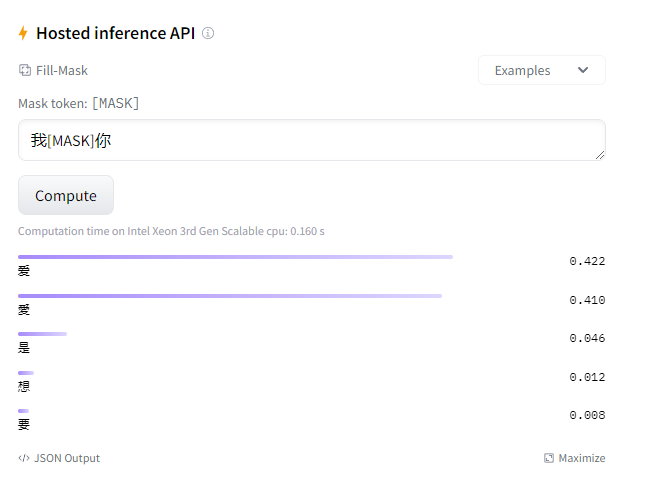

Nosso modelo não foi capaz de fazer essa generalização. Inclusive, como os tokens 我 e 你 não estão presentes em nosso dataset sintético, ele deve ter entendido que se tratavam de dois substantivos e por causa da gramática limitada do portuchinês previu adjetivos entre eles.

In [ ]:
# 我爱你 -> Eu amo você

text = "我[MASK]你"
classifier(text)

[{'score': 0.45152050256729126,
  'token': 21205,
  'token_str': 'legal',
  'sequence': '我 legal 你'},
 {'score': 0.11002440005540848,
  'token': 21143,
  'token_str': 'emocionante',
  'sequence': '我 emocionante 你'},
 {'score': 0.10259989649057388,
  'token': 21160,
  'token_str': 'divertido',
  'sequence': '我 divertido 你'},
 {'score': 0.08403856307268143,
  'token': 21196,
  'token_str': 'exuberante',
  'sequence': '我 exuberante 你'},
 {'score': 0.07965714484453201,
  'token': 21233,
  'token_str': 'bonito',
  'sequence': '我 bonito 你'}]

## Conclusões

Apesar do nosso modelo de linguagem natural ter sido capaz de aprender a sintaxe do portuchinês, uma língua limitada e com dataset criado sintéticamente, obtivemos poucas evidências de que o conhecimento adquirido no treinamento do modelo BERT em vários corpora chineses seria transferido para o nosso. No entanto, a abordagem poderia ser melhorada criando um conjunto de dados sintéticos mais rico e combinando palavras do português e do mandarim.

### Possíveis melhorias

- Melhorar o gerador de dataset sintético com mais formas gramáticas, verbos, objetos, etc;
- Diminuir o learning rate e adicionar mais épocas;
- Adicionar textos de ambas os idiomas para não causar esquecimento no bert-based-chinese.
- Treinar outras tarefas como NER que não foram realizadas por falta de tempo 🤫
